In [44]:
import xarray as xr 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os

import functions.eddy_feedback as ef

# Reanalysis calculations (500 hPa)

## Reanalysis EFPs

In [45]:
path = '/home/links/ct715/data_storage/reanalysis/srip_datasets'
data_file = os.path.join(path, 'JRA55_srip_ubar_div1.nc')
jra_srip = xr.open_mfdataset(data_file, chunks={'time': 30})
jra_srip = jra_srip.sel(time=slice('1979-01', '2010-12'))

nh_efp = ef.calculate_efp(jra_srip, data_type='reanalysis', which_div1='div1_pr', slice_500hPa=True)
sh_efp = ef.calculate_efp(jra_srip, data_type='reanalysis', calc_south_hemis=True, which_div1='div1_pr', slice_500hPa=True)

print(nh_efp, sh_efp)

0.4825 0.3598


## Reanalysis variances

### NAM (AO) and SAM (AAO)

In [46]:
eofs_ds_nam = xr.open_dataset('/home/links/ct715/eddy_feedback/chapter1/annular_modes/NAO/data/jra55/jra55_daily_u500_eofs_nh.nc')
ao = -eofs_ds_nam['pc1'].sel(mode=0)
ao = ao.sel(time=slice('1979-01', '2010-12-31'))
ao_var = ao.var().round(1).values
print('AO variance:', ao_var)

eofs_ds_sam = xr.open_dataset('./data/jra55/jra55_daily_u500_eofs_sh.nc')
aao = -eofs_ds_sam['pc1'].sel(mode=0)
aao = aao.sel(time=slice('1979-01', '2010-12-31'))
aao_var = aao.var().round(1).values
print('AAO variance:', aao_var)

AO variance: 9235.0
AAO variance: 9495.8


# PAMIP data
## NH vs SH EFP

In [47]:
df_efp = pd.read_csv('/home/links/ct715/eddy_feedback/chapter1/efp_random/data/500hPa_efp_13models.csv', index_col=0)
df_efp

,model,efp_nh,efp_sh
0,CESM1-WACCM-SC,0.1627,0.0400
1,CESM2,0.3420,0.3365
2,CNRM-CM6-1,0.2338,0.1762
3,CanESM5,0.4382,0.4312
4,EC-EARTH3,0.2717,0.2628
5,FGOALS-f3-L,0.1805,0.0838
6,HadGEM3-GC31-LL,0.2240,0.2926
7,HadGEM3-GC31-MM,0.2931,0.2793
8,IPSL-CM6A-LR,0.2515,0.1353
9,MIROC6,0.2536,0.2868


## NH EFP vs NAM variance

In [48]:
path = '/home/links/ct715/eddy_feedback/chapter1/annular_modes/'
nam_data = path + '/NAO/data/pamip_misc/pc1_variance_DJF.csv'

nam = pd.read_csv(nam_data)

# Merge the DataFrames on the 'model' column
merged_df_nam = pd.merge(nam, df_efp, left_on='model', right_on='model')

# Select only the columns you want: model, variance, and efp_nh
result_df_nam = merged_df_nam[['model', 'variance', 'efp_nh']]
df_nam = result_df_nam.rename(columns={'variance': 'nam_variance'})
df_nam

,model,nam_variance,efp_nh
0,CESM2,20738.21,0.3420
1,CNRM-CM6-1,16797.78,0.2338
2,CanESM5,3485.68,0.4382
3,EC-EARTH3,52837.83,0.2717
4,FGOALS-f3-L,21184.31,0.1805
5,HadGEM3-GC31-LL,8823.29,0.2240
6,HadGEM3-GC31-MM,46447.08,0.2931
7,IPSL-CM6A-LR,9085.22,0.2515
8,MIROC6,9828.57,0.2536
9,NorESM2-LM,4271.22,0.3423


# SH EFP vs SAM variance

In [49]:
path = '/home/links/ct715/eddy_feedback/chapter1/annular_modes/'
sam_data = path + '/500hPa/data/pamip_misc/pc1_variance_JAS.csv'

sam = pd.read_csv(sam_data)
# Merge the DataFrames on the 'model' column
merged_df_sam = pd.merge(sam, df_efp, left_on='model', right_on='model')

# Select only the columns you want: model, variance, and efp_sh
result_df_sam = merged_df_sam[['model', 'variance', 'efp_sh']]
df_sam = result_df_sam.rename(columns={'variance': 'sam_variance'})
df_sam


,model,sam_variance,efp_sh
0,CESM2,9306.06,0.3365
1,CNRM-CM6-1,7090.76,0.1762
2,CanESM5,1678.71,0.4312
3,EC-EARTH3,23768.98,0.2628
4,FGOALS-f3-L,8981.88,0.0838
5,HadGEM3-GC31-LL,4801.91,0.2926
6,HadGEM3-GC31-MM,23812.96,0.2793
7,IPSL-CM6A-LR,4003.67,0.1353
8,MIROC6,5293.56,0.2868
9,NorESM2-LM,3206.62,0.3204


# NAM variance vs SAM variance

In [50]:
df = pd.merge(df_nam, df_sam, on='model', how='outer')
df

,model,nam_variance,efp_nh,sam_variance,efp_sh
0,CESM2,20738.21,0.3420,9306.06,0.3365
1,CNRM-CM6-1,16797.78,0.2338,7090.76,0.1762
2,CanESM5,3485.68,0.4382,1678.71,0.4312
3,EC-EARTH3,52837.83,0.2717,23768.98,0.2628
4,FGOALS-f3-L,21184.31,0.1805,8981.88,0.0838
5,HadGEM3-GC31-LL,8823.29,0.2240,4801.91,0.2926
6,HadGEM3-GC31-MM,46447.08,0.2931,23812.96,0.2793
7,IPSL-CM6A-LR,9085.22,0.2515,4003.67,0.1353
8,MIROC6,9828.57,0.2536,5293.56,0.2868
9,NorESM2-LM,4271.22,0.3423,3206.62,0.3204


# All combined

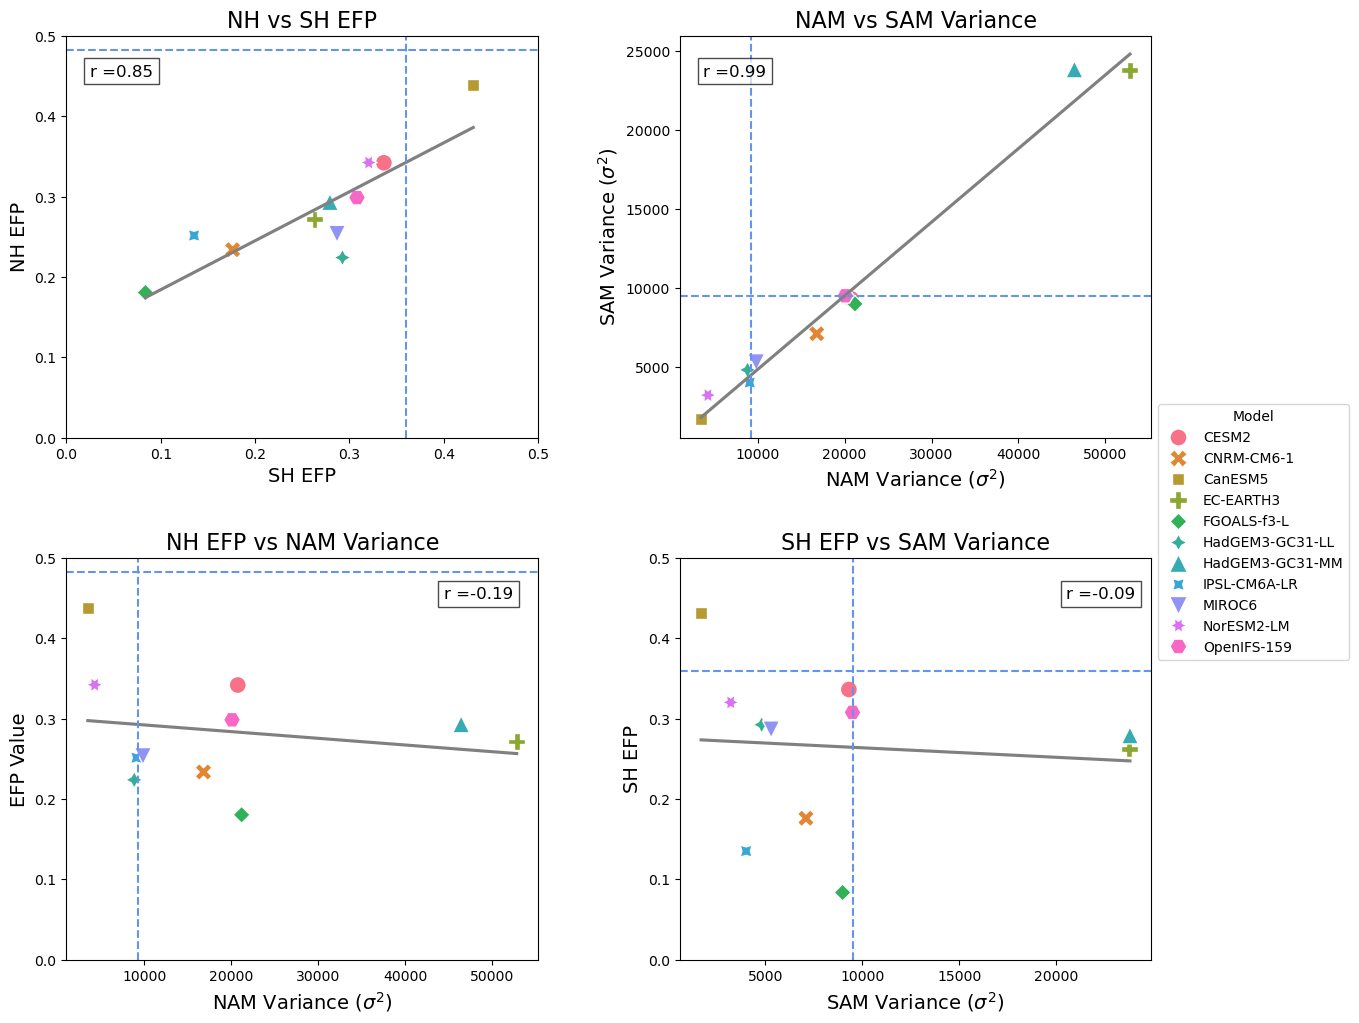

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# ax1 (NH vs SH EFP)
sns.regplot(data=df, x='efp_sh', y='efp_nh', scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None, ax=axes[0,0])
sns.scatterplot(data=df, x='efp_sh', y='efp_nh', hue='model', style='model', s=150, ax=axes[0,0])
r, p = sp.stats.pearsonr(x=df['efp_nh'], y=df['efp_sh'])
axes[0,0].text(.05, .9, "r ={:.2f}".format(r), transform=axes[0,0].transAxes, 
               bbox=dict(facecolor="white", alpha=0.7), fontsize=12)
axes[0,0].axhline(nh_efp, linestyle='--', color='cornflowerblue')
axes[0,0].axvline(sh_efp, linestyle='--', color='cornflowerblue')
axes[0,0].set_ylabel('NH EFP', fontsize=14)
axes[0,0].set_xlabel('SH EFP', fontsize=14)
axes[0,0].set_title('NH vs SH EFP', fontsize=16)
axes[0,0].set_xlim(0, 0.5)
axes[0,0].set_ylim(0, 0.5)
axes[0,0].get_legend().remove()

# ax2 (NAM vs SAM variance)
sns.regplot(data=df, y='sam_variance', x='nam_variance', scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None, ax=axes[0,1])
sns.scatterplot(data=df, y='sam_variance', x='nam_variance', hue='model', style='model', s=150, ax=axes[0,1])
r, p = sp.stats.pearsonr(x=df['nam_variance'], y=df['sam_variance'])
axes[0,1].text(.05, .9, "r ={:.2f}".format(r), transform=axes[0,1].transAxes, 
               bbox=dict(facecolor="white", alpha=0.7), fontsize=12)
axes[0,1].axvline(ao_var, linestyle='--', color='cornflowerblue')
axes[0,1].axhline(aao_var, linestyle='--', color='cornflowerblue')
axes[0,1].set_xlabel('NAM Variance ($\sigma^2$)', fontsize=14)
axes[0,1].set_ylabel('SAM Variance ($\sigma^2$)', fontsize=14)
axes[0,1].set_title('NAM vs SAM Variance', fontsize=16)
axes[0,1].get_legend().remove()

# ax3 (NH EFP vs NAM variance)
sns.regplot(data=df_nam, y='efp_nh', x='nam_variance', scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None, ax=axes[1,0])
sns.scatterplot(data=df_nam, y='efp_nh', x='nam_variance', hue='model', style='model', s=150, ax=axes[1,0])
r, p = sp.stats.pearsonr(x=df_nam['nam_variance'], y=df_nam['efp_nh'])
axes[1,0].text(.8, .9, "r ={:.2f}".format(r), transform=axes[1,0].transAxes, 
               bbox=dict(facecolor="white", alpha=0.7), fontsize=12)
axes[1,0].axvline(ao_var, linestyle='--', color='cornflowerblue')
axes[1,0].axhline(nh_efp, linestyle='--', color='cornflowerblue')
axes[1,0].set_xlabel('NAM Variance ($\sigma^2$)', fontsize=14)
axes[1,0].set_ylabel('EFP Value', fontsize=14)
axes[1,0].set_ylim(0, 0.5)
axes[1,0].set_title('NH EFP vs NAM Variance', fontsize=16)
axes[1,0].get_legend().remove()

# ax4 (SH EFP vs SAM variance)
sns.regplot(data=df_sam, y='efp_sh', x='sam_variance', scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None, ax=axes[1,1])
sns.scatterplot(data=df_sam, y='efp_sh', x='sam_variance', hue='model', style='model', s=150, ax=axes[1,1])
r, p = sp.stats.pearsonr(x=df_sam['sam_variance'], y=df_sam['efp_sh'])
axes[1,1].text(.82, .9, "r ={:.2f}".format(r), transform=axes[1,1].transAxes, 
               bbox=dict(facecolor="white", alpha=0.7), fontsize=12)
axes[1,1].axvline(aao_var, linestyle='--', color='cornflowerblue')
axes[1,1].axhline(sh_efp, linestyle='--', color='cornflowerblue')
axes[1,1].set_xlabel('SAM Variance ($\sigma^2$)', fontsize=14)
axes[1,1].set_ylabel('SH EFP', fontsize=14)
axes[1,1].set_ylim(0, 0.5)
axes[1,1].set_title('SH EFP vs SAM Variance', fontsize=16)
axes[1,1].get_legend().remove()

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.legend(bbox_to_anchor=(1,1.4), title='Model')
plt.savefig('./plots/U500_efp_vs_variance.png', dpi=300, bbox_inches='tight')
plt.show()


## Remove 2 models

In [52]:
remove_models = ['EC-EARTH3', 'HadGEM3-GC31-MM']

df2 = df[~df['model'].isin(remove_models)].reset_index(drop=True)
df2

,model,nam_variance,efp_nh,sam_variance,efp_sh
0,CESM2,20738.21,0.3420,9306.06,0.3365
1,CNRM-CM6-1,16797.78,0.2338,7090.76,0.1762
2,CanESM5,3485.68,0.4382,1678.71,0.4312
3,FGOALS-f3-L,21184.31,0.1805,8981.88,0.0838
4,HadGEM3-GC31-LL,8823.29,0.2240,4801.91,0.2926
5,IPSL-CM6A-LR,9085.22,0.2515,4003.67,0.1353
6,MIROC6,9828.57,0.2536,5293.56,0.2868
7,NorESM2-LM,4271.22,0.3423,3206.62,0.3204
8,OpenIFS-159,20080.30,0.2987,9493.30,0.3080


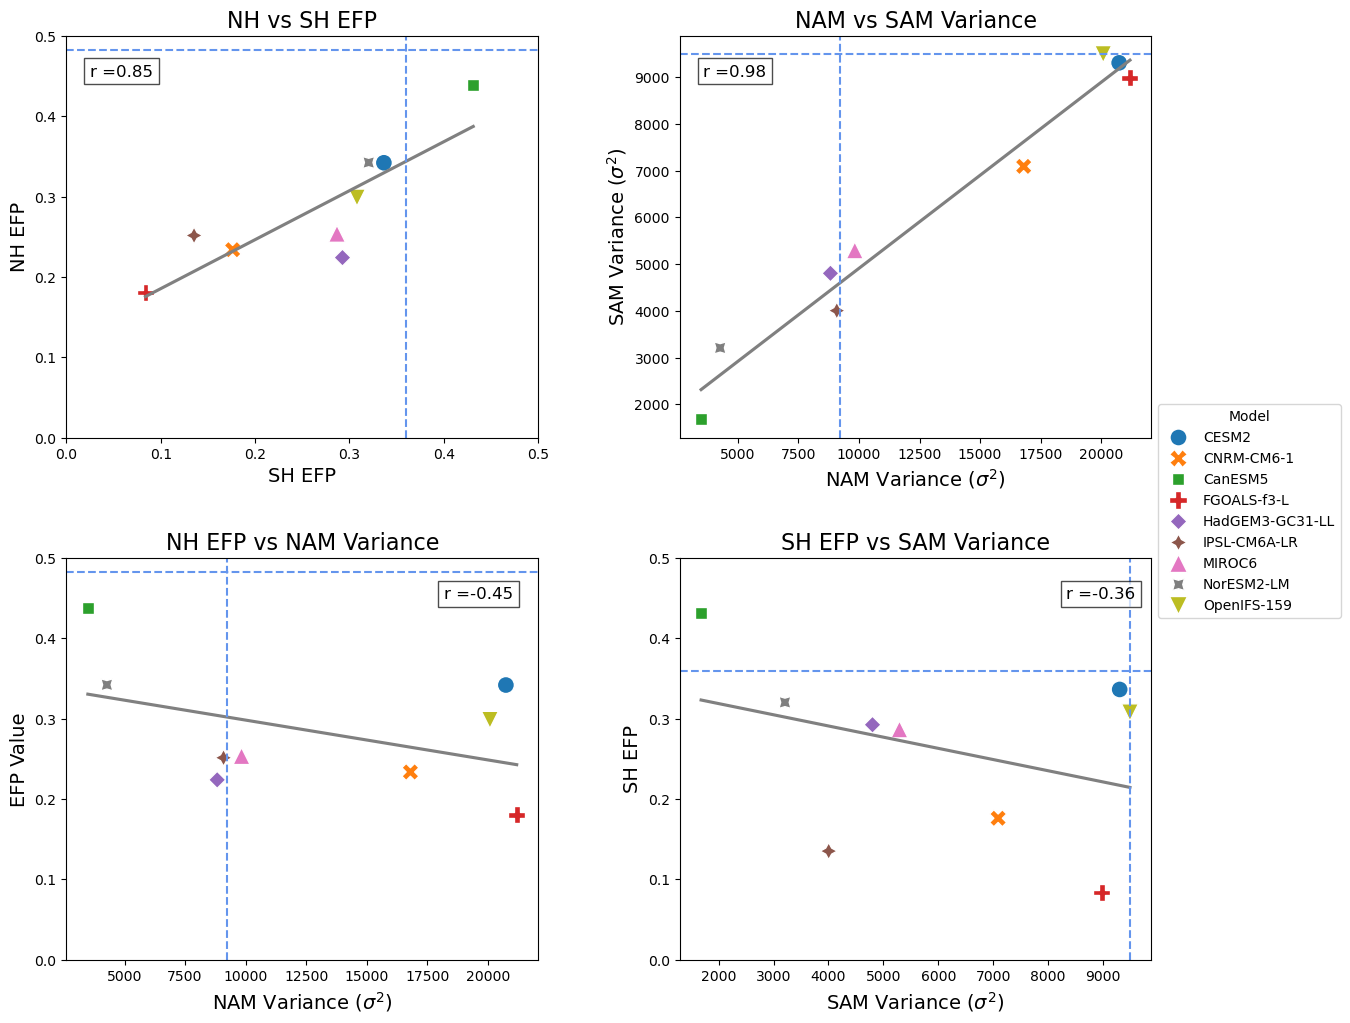

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# ax1 (NH vs SH EFP)
sns.regplot(data=df2, x='efp_sh', y='efp_nh', scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None, ax=axes[0,0])
sns.scatterplot(data=df2, x='efp_sh', y='efp_nh', hue='model', style='model', s=150, ax=axes[0,0])
r, p = sp.stats.pearsonr(x=df2['efp_nh'], y=df2['efp_sh'])
axes[0,0].text(.05, .9, "r ={:.2f}".format(r), transform=axes[0,0].transAxes, 
               bbox=dict(facecolor="white", alpha=0.7), fontsize=12)
axes[0,0].axhline(nh_efp, linestyle='--', color='cornflowerblue')
axes[0,0].axvline(sh_efp, linestyle='--', color='cornflowerblue')
axes[0,0].set_ylabel('NH EFP', fontsize=14)
axes[0,0].set_xlabel('SH EFP', fontsize=14)
axes[0,0].set_title('NH vs SH EFP', fontsize=16)
axes[0,0].set_xlim(0, 0.5)
axes[0,0].set_ylim(0, 0.5)
axes[0,0].get_legend().remove()

# ax2 (NAM vs SAM variance)
sns.regplot(data=df2, y='sam_variance', x='nam_variance', scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None, ax=axes[0,1])
sns.scatterplot(data=df2, y='sam_variance', x='nam_variance', hue='model', style='model', s=150, ax=axes[0,1])
r, p = sp.stats.pearsonr(x=df2['nam_variance'], y=df2['sam_variance'])
axes[0,1].text(.05, .9, "r ={:.2f}".format(r), transform=axes[0,1].transAxes, 
               bbox=dict(facecolor="white", alpha=0.7), fontsize=12)
axes[0,1].axvline(ao_var, linestyle='--', color='cornflowerblue')
axes[0,1].axhline(aao_var, linestyle='--', color='cornflowerblue')
axes[0,1].set_xlabel('NAM Variance ($\sigma^2$)', fontsize=14)
axes[0,1].set_ylabel('SAM Variance ($\sigma^2$)', fontsize=14)
axes[0,1].set_title('NAM vs SAM Variance', fontsize=16)
axes[0,1].get_legend().remove()

# ax3 (NH EFP vs NAM variance)
sns.regplot(data=df2, y='efp_nh', x='nam_variance', scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None, ax=axes[1,0])
sns.scatterplot(data=df2, y='efp_nh', x='nam_variance', hue='model', style='model', s=150, ax=axes[1,0])
r, p = sp.stats.pearsonr(x=df2['nam_variance'], y=df2['efp_nh'])
axes[1,0].text(.8, .9, "r ={:.2f}".format(r), transform=axes[1,0].transAxes, 
               bbox=dict(facecolor="white", alpha=0.7), fontsize=12)
axes[1,0].axvline(ao_var, linestyle='--', color='cornflowerblue')
axes[1,0].axhline(nh_efp, linestyle='--', color='cornflowerblue')
axes[1,0].set_xlabel('NAM Variance ($\sigma^2$)', fontsize=14)
axes[1,0].set_ylabel('EFP Value', fontsize=14)
axes[1,0].set_ylim(0, 0.5)
axes[1,0].set_title('NH EFP vs NAM Variance', fontsize=16)
axes[1,0].get_legend().remove()

# ax4 (SH EFP vs SAM variance)
sns.regplot(data=df2, y='efp_sh', x='sam_variance', scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None, ax=axes[1,1])
sns.scatterplot(data=df2, y='efp_sh', x='sam_variance', hue='model', style='model', s=150, ax=axes[1,1])
r, p = sp.stats.pearsonr(x=df2['sam_variance'], y=df2['efp_sh'])
axes[1,1].text(.82, .9, "r ={:.2f}".format(r), transform=axes[1,1].transAxes, 
               bbox=dict(facecolor="white", alpha=0.7), fontsize=12)
axes[1,1].axvline(aao_var, linestyle='--', color='cornflowerblue')
axes[1,1].axhline(sh_efp, linestyle='--', color='cornflowerblue')
axes[1,1].set_xlabel('SAM Variance ($\sigma^2$)', fontsize=14)
axes[1,1].set_ylabel('SH EFP', fontsize=14)
axes[1,1].set_ylim(0, 0.5)
axes[1,1].set_title('SH EFP vs SAM Variance', fontsize=16)
axes[1,1].get_legend().remove()

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.legend(bbox_to_anchor=(1,1.4), title='Model')
plt.savefig('./plots/U500_efp_vs_variance.png', dpi=300, bbox_inches='tight')
plt.show()
